#### 1. Propose a statistical analysis for multiple comparisons.

We have data divided as 20 patients per study (total 80) as the sample size is low usage of non-parametertic techniques are to be preferred and multi group statistical tests are to be utilized.

We make the following assumption

+ The data for each group are samples originate from the same distribution.
+ We assume the data to be normally distributed.

#### 2. Carry out the analysis using the attached data

Carried out below

In [13]:
# a first look at the data
head(data)
summary(data)

,X,ID,GROUP,NFL
,<int>,<int>,<chr>,<dbl>
1,1,1,Control,39.195
2,2,2,Control,30.453
3,3,3,Control,46.740
4,4,4,Control,20.433
5,5,5,Control,21.704
6,6,6,Control,40.507


       X               ID           GROUP                NFL        
 Min.   : 1.00   Min.   : 1.00   Length:80          Min.   : 8.295  
 1st Qu.:20.75   1st Qu.:20.75   Class :character   1st Qu.:18.137  
 Median :40.50   Median :40.50   Mode  :character   Median :22.509  
 Mean   :40.50   Mean   :40.50                      Mean   :26.622  
 3rd Qu.:60.25   3rd Qu.:60.25                      3rd Qu.:31.131  
 Max.   :80.00   Max.   :80.00                      Max.   :72.712  

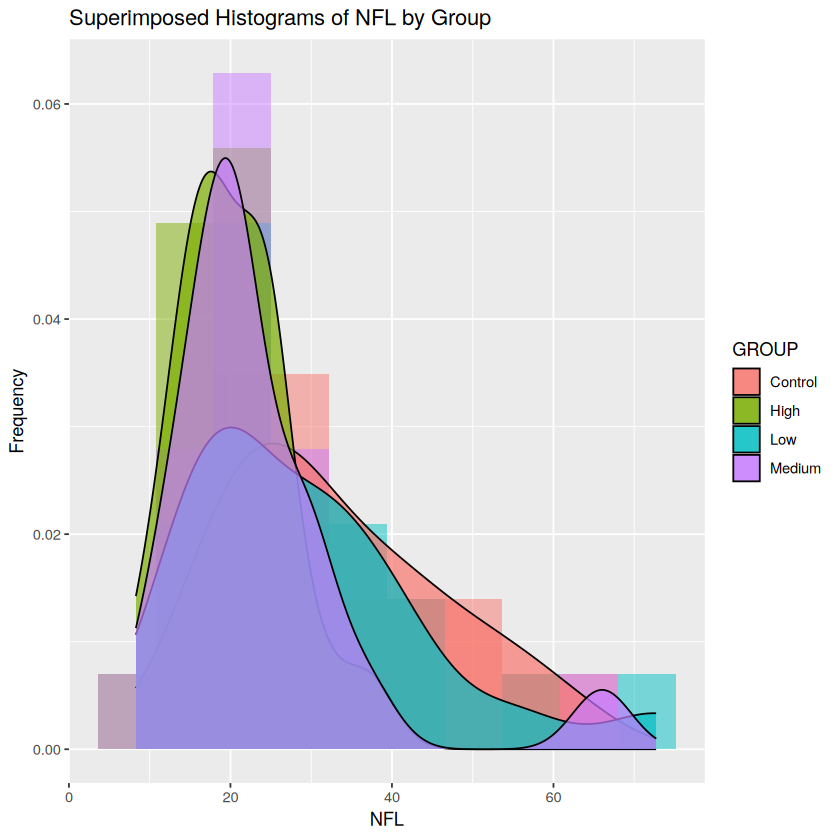

In [ ]:
# Plot histograms for each group with overlayed density curves
ggplot(data, aes(x = NFL, fill = GROUP)) +
  geom_histogram(aes(y = ..density..), alpha = 0.5, position = "identity", bins = 10) +
  geom_density(alpha = 0.7) +
  labs(title = "Superimposed Histograms of NFL by Group", x = "NFL", y = "Frequency")

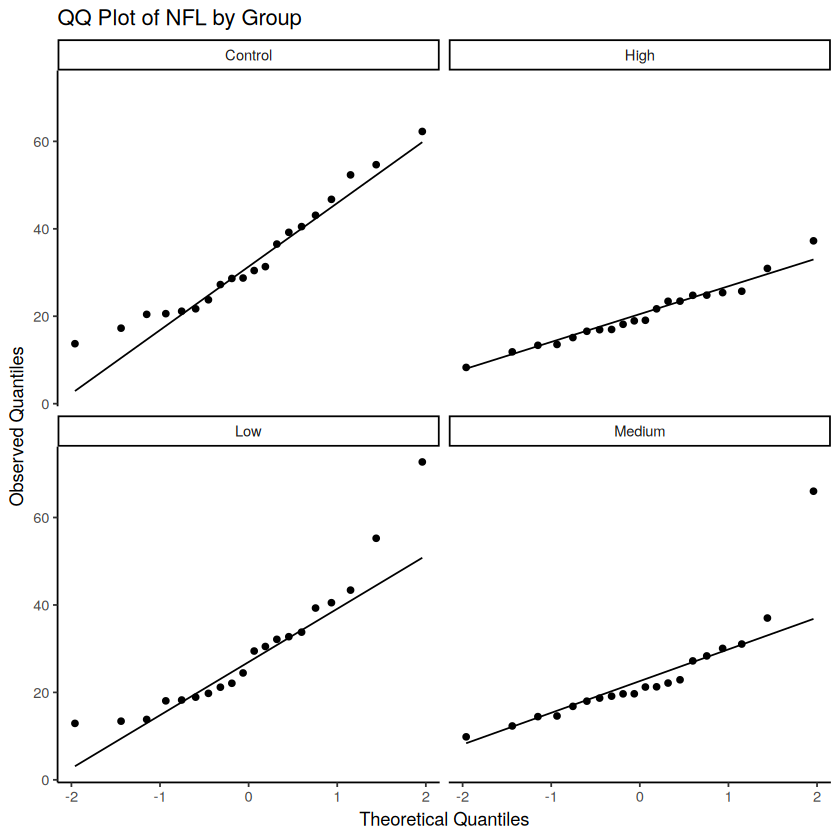

In [9]:
ggplot(data, aes(sample = NFL)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~ GROUP) +
  labs(title = "QQ Plot of NFL by Group", x = "Theoretical Quantiles", y = "Observed Quantiles") +
  theme_classic()

#### 3. Plot the data, interpret and comment on the results.

Here in the QQ Plot we can observe Control & High to follow the normal line quite well vice versa Low and Medium are diverging away from the normal line.
These observations question our assumptions made about the data.

+ 2/4 groups seem to be following normal distribution and other 2/4 are not.
+ We can visually observe only 2/4 groups to be following the normal distribution.

*To verify our observations we use Kruskal-Wallis rank sum test to see if they are sampled from the same distribution.*

In [10]:
kruskal.test(NFL ~ GROUP, data)


	Kruskal-Wallis rank sum test

data:  NFL by GROUP
Kruskal-Wallis chi-squared = 12.64, df = 3, p-value = 0.005483


Kruskal-Wallis rank sum test gives us the p-value of 0.005483 which is very less than our tolerance of 0.05, that would entail that the groups are sampled from different distributions i.e. both our assumptions are proven wrong.

+ Data for each group have been sampled from different distributions. 
+ As our previous assumption is untrue that would also mean that not all the groups are normal. If they were p-value would be higher as they would have been sampled from normal distribution. 

*Now we will use Conover–Iman test to do pairwise comparision. It is based on Kruskal-Wallis test.*

In [11]:
library(conover.test)


conover.test(data$NFL, data$GROUP)

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 12.6402, df = 3, p-value = 0.01


                           Comparison of x by group                            
                                (No adjustment)                                
Col Mean-|
Row Mean |    Control       High        Low
---------+---------------------------------
    High |   3.429637
         |    0.0005*
         |
     Low |   1.099522  -2.330114
         |     0.1375    0.0112*
         |
  Medium |   2.723321  -0.706316   1.623798
         |    0.0040*     0.2411     0.0543

alpha = 0.05
Reject Ho if p <= alpha/2


The Conover-Iman test likewise preserves the ranks that the Kruskal-Wallis uses, and uses a pooled variance estimate to construct post hoc t test statistics. 

From the p-values we can observe that there is significant p values for Control vs High group = 0.0005 & Medium vs Control = 0.004.
There is also a very significant correlation between Medium vs Hight but is irrelevant to our testing.

**Results** 
1. The groups are not distributed normally or sampled from same distribution.
2. The dosage *MECAS-123* is only significant for High and Medium dosage and shows an improvement in reduced NfL levels.
+ For High dosage 12.7037 pg/mL mean reduction. (Significant)
+ For Medium dosage 9.49985 pg/mL mean reduction. (Significant)
+ For Low dosage 3.38745 pg/mL mean reduction. (Insignificant)